In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
img = cv2.imread("./test_images/sharapova1.jpg")

In [4]:
img.shape

(555, 700, 3)

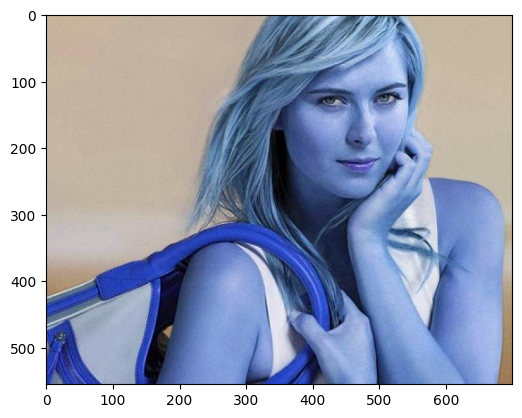

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

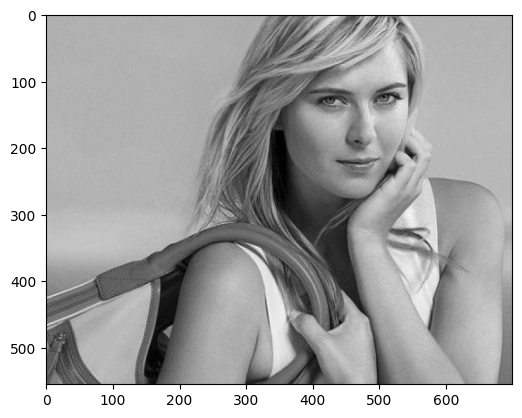

In [7]:
plt.imshow(gray,cmap="gray")

### Open CV eyes and nose

In [8]:
# face
face_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_eye.xml")
faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[352,  38, 233, 233]])

In [9]:
x,y,w,h = faces[0]
x,y,w,h

(352, 38, 233, 233)

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

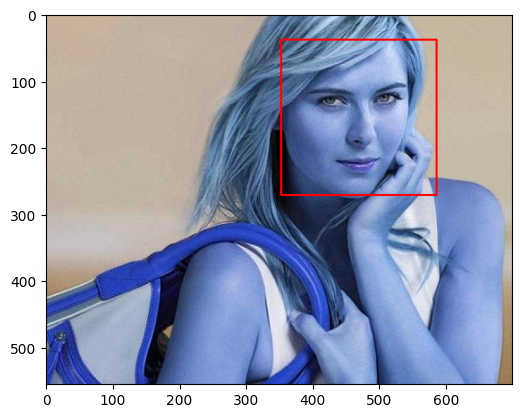

In [11]:
plt.imshow(face_img)

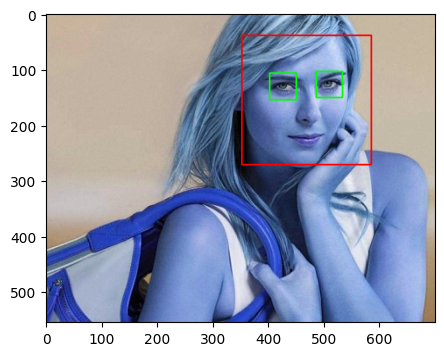

In [12]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure(figsize=(6,4))
plt.imshow(face_img,cmap="gray")
plt.show()

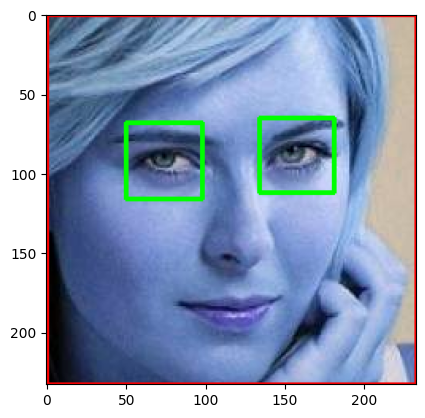

In [15]:
%matplotlib inline
plt.imshow(roi_color,cmap="gray") # roi = region of interest

In [16]:
cropped_img = np.array(roi_color)
cropped_img.shape

(233, 233, 3)

In [17]:
gray.shape

(555, 700)

In [18]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color # will only return one image though it can contain two

In [ ]:
original_img = cv2.imread("./test_images/sharapova2.JPG")


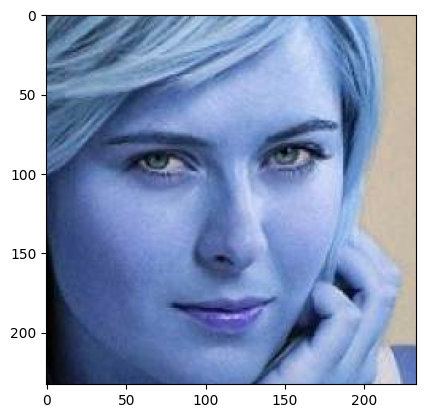

In [20]:
cropped_img = get_cropped_image_if_2_eyes("./test_images/sharapova1.jpg")
plt.imshow(cropped_img)

### Image with not two eye detected clearly

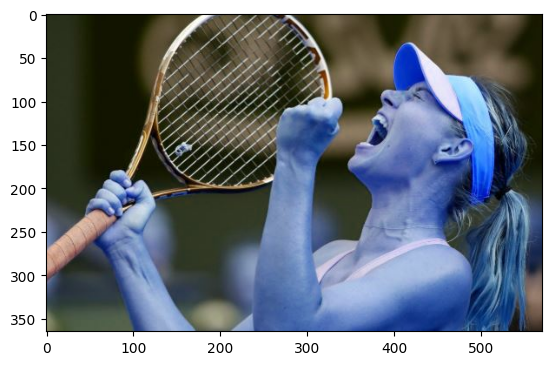

In [21]:
plt.imshow(cv2.imread("./test_images/sharapova2.JPG"))

In [24]:
cropped_img2 = get_cropped_image_if_2_eyes("./test_images/sharapova2.JPG")


In [25]:
#plt.imshow(cropped_img2) # no output

In [28]:
path_to_data = "./project_2_images/"
path_to_cr_data = "./project_2_images/cropped"

In [35]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    img_dirs.append(entry.path) 

In [36]:
img_dirs

['./project_2_images/cropped',
 './project_2_images/lionel_messi',
 './project_2_images/maria_sharapova',
 './project_2_images/roger_federer',
 './project_2_images/serena_williams',
 './project_2_images/virat_kohli']

In [33]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [39]:
cropped_image_dirs = []
celebrity_file_names_dict = []

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split("/")[-1]
    print(celebrity_name)
    if celebrity_name != "cropped":
        for entry in os.scandir(img_dir):
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = path_to_cr_data+celebrity_name
                if not os.path.exists(cropped_folder):
                    os.mkdir(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating Cropped image in folder: ",cropped_folder)
                    
                cropped_file_name = celebrity_name+str(count)+".png"
                cropped_file_path = cropped_folder+"./"+cropped_file_name
                
                cv2.imwrite(cropped_file_path,roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1    
                  

cropped
lionel_messi


TypeError: list indices must be integers or slices, not str

In [40]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

# Feature Engineering

Wavelet is used to extract feature from images. We wil use this library to extract features in this program

In [42]:
import numpy as np 
import pywt
import cv2

ModuleNotFoundError: No module named 'pywt'